In [2]:
import pysam
import numpy as np
import cPickle as pickle

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from collections import Counter

In [5]:
import matplotlib.pyplot as plt

In [6]:
from pyUMI.umiViews import tag_based_generator, field_based_generator

In [7]:
import logging
logging.basicConfig(level=logging.INFO)

In [8]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_AAAACT.bam","rb")

In [12]:
g1 = field_based_generator(st, 'flag', [4], False)
g2 = tag_based_generator(g1, 'NH', [1], False)
A = {}
for g in g2:
    ge = None
    if g.has_tag('GE'):
        ge = g.get_tag('GE')
    if g.query_name in A:
        A[g.query_name].append(ge)
    else:
        A.update({g.query_name:[ge]})

In [15]:
B = {}
for k in A:
    if not None in A[k]:
        B.update({k:A[k]})

In [25]:
def repeat_family(genes):
    families = []
    for gene in genes:
        prefix = gene[:gene.rfind('dup') -1]
        families.append(prefix)
    return families

In [24]:
def separate_genes(genes):
    g = []
    r = []
    for gene in genes:
        if 'ENSMUS' in gene:
            g.append(gene)
        else:
            r.append(gene)
    return r, g

In [30]:
C = {}
D = {}
for item in B:
    r, g = separate_genes(B[item])
    rf = len(Counter(repeat_family(r)).keys())
    gf = len(Counter(g).keys())
    C.update({item:gf})
    D.update({item:rf})

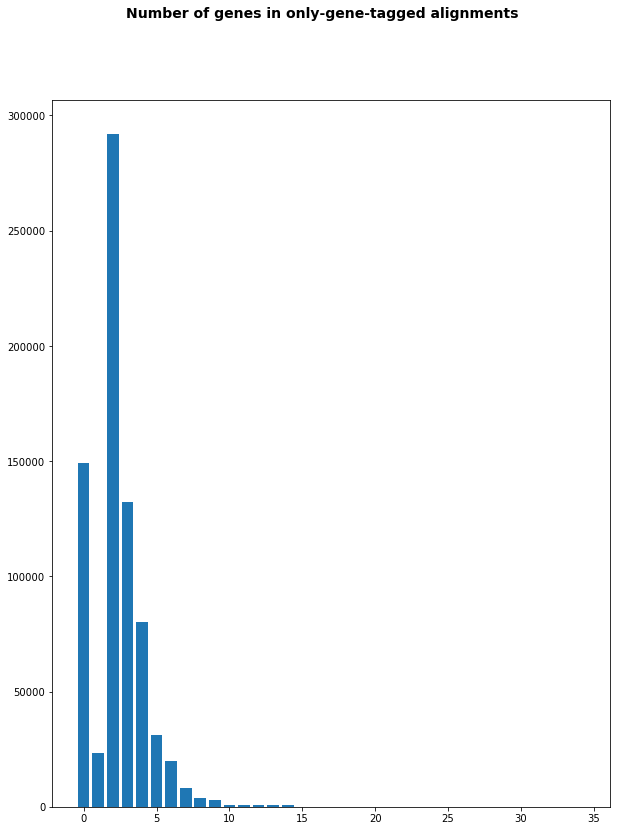

In [50]:
n_genes = [i for i in C.values()]
bng = Counter(n_genes)
fig = plt.figure(figsize=(10,13))
fig.suptitle('Number of genes in only-gene-tagged alignments', fontsize=14, fontweight='bold')

plt.bar(bng.keys(), bng.values(), align='center');
plt.savefig('t1')

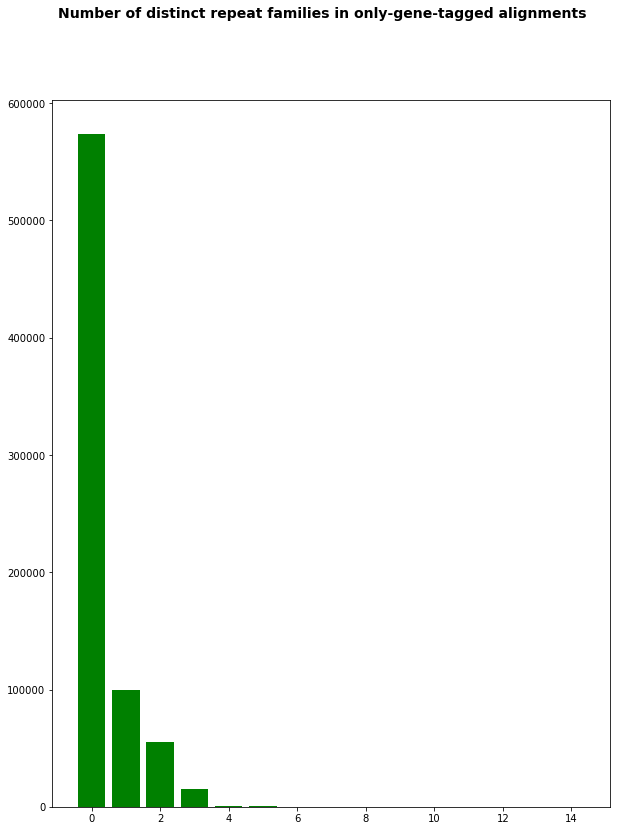

In [53]:
n_repeats = [i for i in D.values()]
rng = Counter(n_repeats)

fig = plt.figure(figsize=(10,13))
fig.suptitle('Number of distinct repeat families in only-gene-tagged alignments', fontsize=14, fontweight='bold')
plt.bar(rng.keys(), rng.values(), align='center', color='g');
plt.savefig('t2')

--------------------------------

In [9]:
st = pysam.AlignmentFile("/data/UMI/data/MUS/sample_GACCGC.bam","rb")

In [17]:
st.reset()
reads = st.fetch(until_eof=True)

In [15]:
%%time
st.reset()
reads = st.fetch(until_eof=True)
uqs = {}
for r in reads:
    if not r.is_unmapped and r.get_tag('NH') == 1:
        xm = r.get_tag('XM')
        if r.has_tag('GE') :
            g = r.get_tag('GE')
        else:
            g = None
        if xm in uqs:
            uqs[xm].append(g)
        else:
            uqs.update({xm:[g]})
        

CPU times: user 15.1 s, sys: 141 ms, total: 15.2 s
Wall time: 15.3 s


In [16]:
uqs

{'TTATTTATTG': ['ENSMUSG00000028470',
  'ENSMUSG00000028470',
  'ENSMUSG00000028470',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708',
  'ENSMUSG00000031708'],
 'TTATTTATTC': ['ENSMUSG00000061848',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608',
  'ENSMUSG00000024608'],
 'GATGACATGA': ['B2_Mm1t_dup10962'],
 'ATTAATAGAT': ['ENSMUSG00000037628', None, None],
 'TTATTTTACT': ['ENSMUSG00000082908',
  'ENSMUSG00000082908',
  'ENSMUSG00000082908'],
 'CGCCGTACTT': ['ENSMUSG00000018770',
  'ENSMUSG000

In [18]:
%%time
uqc = {}
for r in reads:
    if not r.is_unmapped and r.get_tag('NH') == 1:
        xm = r.get_tag('XM')
        if r.has_tag('GE') :
            g = r.get_tag('GE')
        else:
            g = r.reference_name
        if xm in uqc:
            uqc[xm].append(g)
        else:
            uqc.update({xm:[g]})

CPU times: user 15.4 s, sys: 153 ms, total: 15.6 s
Wall time: 15.6 s


In [23]:
uqc_list = []
for xm in uqc:
    uqc_list.append((xm, list(np.unique(uqc[xm]))))

In [26]:
def is_gene(str):
    if 'ENSMUS' in str:
        return True
    else:
        return False

In [74]:
def get_genes(genes):
    l = []
    for g in genes:
        if is_gene(g):
            l.append(g)
    return l

In [27]:
def is_repeat(str):
    if 'dup' in str:
        return True
    else:
        return False

In [93]:
def get_repeats(genes):
    l = []
    for g in genes:
        if is_repeat(g):
            l.append(g)
    return l

In [53]:
def is_ref(str):
    if 'chr' in str:
        return True
    else:
        return False

In [101]:
def get_refs(genes):
    l = []
    for g in genes:
        if is_ref(g):
            l.append(g)
    return l

In [28]:
l1 = [(i, len(j)) for i,j in uqc_list]

In [30]:
l2 = [j for i,j in l1]

In [ ]:
# number of genes/repeats/chrs per UMI
d1 = Counter(l2)

In [87]:
l3 = [(i, len(get_genes(j))) for i,j in uqc_list if get_genes(j)]

In [89]:
l4 = [j for i,j in l3]
d2 = Counter(l4)

In [94]:
l5 = [(i, len(get_repeats(j))) for i,j in uqc_list if get_repeats(j)]
d3 = Counter([j for i,j in l5])

In [107]:
l6 = [(i, len(get_refs(j))) for i,j in uqc_list if get_refs(j)]
d4 = Counter([j for i,j in l6])

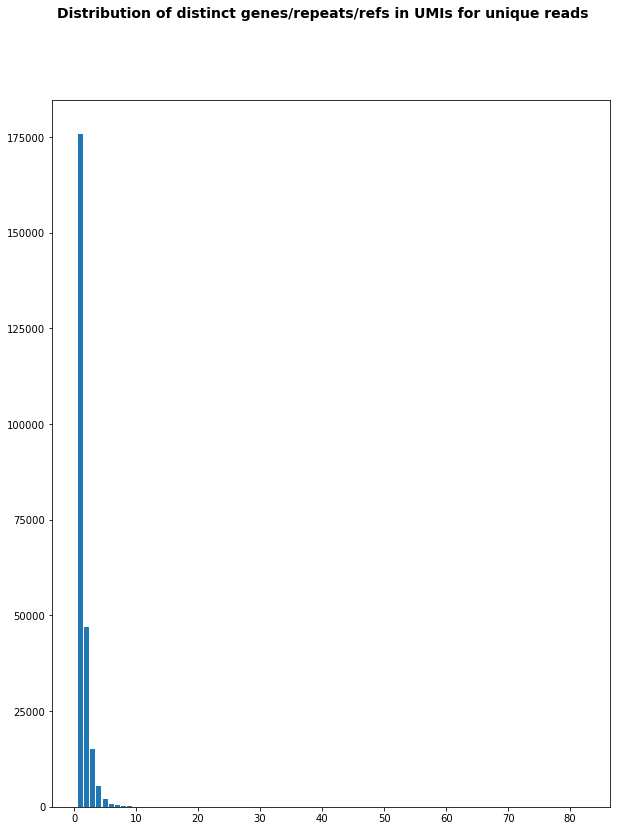

In [97]:
fig = plt.figure(figsize=(10,13))
fig.suptitle('Distribution of distinct genes/repeats/refs in UMIs for unique reads', fontsize=14, fontweight='bold')
plt.bar(d1.keys(), d1.values(), width=.8, align='center');
#plt.savefig('t1')

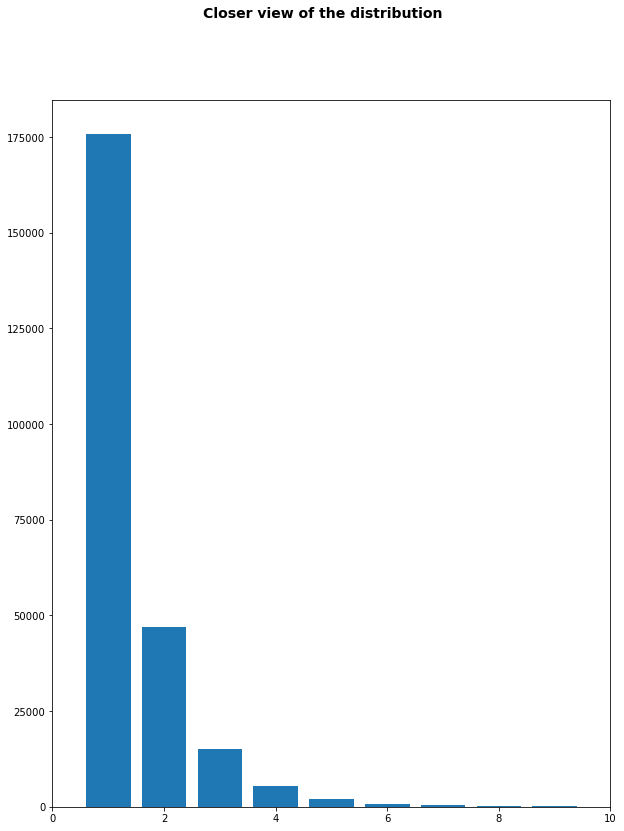

In [98]:
fig = plt.figure(figsize=(10,13))
fig.suptitle('Closer view of the distribution', fontsize=14, fontweight='bold')
plt.xlim(0, 10)
plt.bar(d1.keys(), d1.values(), width=.8, align='center');

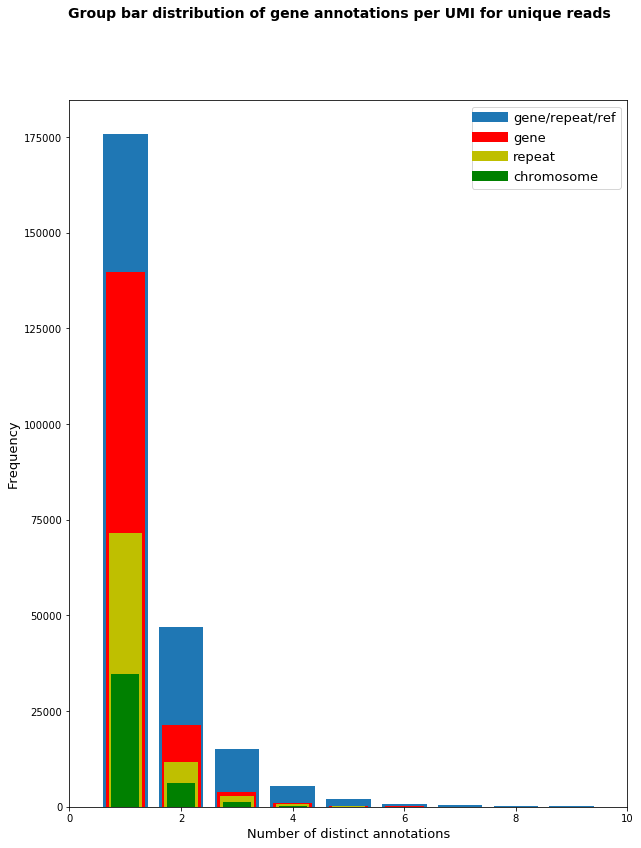

In [235]:
fig = plt.figure(figsize=(10,13))
fig.suptitle('Group bar distribution of gene annotations per UMI for unique reads', fontsize=14, fontweight='bold')

l1 = plt.axhline(y=0.8, linewidth=10)
l2 = plt.axhline(y=0.8, linewidth=10, color='r')
l3 = plt.axhline(y=0.8, linewidth=10, color='y')
l4 = plt.axhline(y=0.8, linewidth=10, color='g')
l1.remove()
l2.remove()
l3.remove()
l4.remove()

plt.legend([l1, l2, l3, l4], ["gene/repeat/ref", "gene", "repeat", "chromosome"], fontsize= 13, loc=1)
plt.xlim(0, 10)
plt.xlabel('Number of distinct annotations' , fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.bar(d1.keys(), d1.values(), width=.8, align='center')
plt.bar(d2.keys(), d2.values(), width=.7, color = 'r', align='center');
plt.bar(d4.keys(), d4.values(), width=.6, color = 'y', align='center');
plt.bar(d3.keys(), d3.values(), width=.5, color = 'g', align='center');

plt.savefig('UMI_gene_dist')

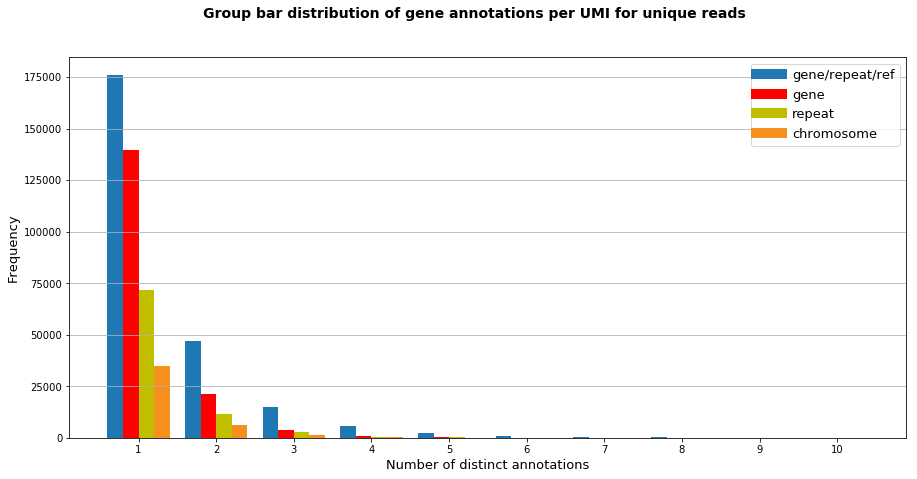

In [236]:
# Setting the positions and width for the bars
pos = list(range(1,11,1))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Group bar distribution of gene annotations per UMI for unique reads', fontsize=14, fontweight='bold')

#create legends
l1 = plt.axhline(y=0.8, linewidth=10)
l2 = plt.axhline(y=0.8, linewidth=10, color='r')
l3 = plt.axhline(y=0.8, linewidth=10, color='y')
l4 = plt.axhline(y=0.8, linewidth=10, color='#F78F1E')
l1.remove()
l2.remove()
l3.remove()
l4.remove()
plt.legend([l1, l2, l3, l4], ["gene/repeat/ref", "gene", "repeat", "chromosome"], fontsize= 13, loc=1)


y1 = sorted(d1.values()[:10], reverse=True)
y2 = sorted(d2.values()[:10], reverse=True)
y3 = d3.values()[:10]
y4 = d4.values()[:10]
# Create a bar with pre_score data,
# in position pos,
plt.bar([p - width for p in pos], y1, width)
plt.bar(pos, y2, width, color='r')
plt.bar([p + width*2 for p in pos], y3, width, color='#F78F1E')
plt.bar([p + width for p in pos], y4, width, color='y')
plt.xticks([i + 0.1 for i in pos])
ax.set_xticklabels(pos)
ax.yaxis.grid()

plt.xlabel('Number of distinct annotations' , fontsize=13)
plt.ylabel('Frequency', fontsize=13)

#plt.grid()
#plt.show()
plt.savefig('UMI_gdist_uniq')

In [134]:
%%time
mqs = {}
st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if not r.is_unmapped and r.get_tag('NH') > 1:
        xm = r.get_tag('XM')
        if r.has_tag('GE') :
            g = r.get_tag('GE')
        else:
            g = r.reference_name
        if xm in mqs:
            mqs[xm].append(g)
        else:
            mqs.update({xm:[g]})

CPU times: user 22.7 s, sys: 268 ms, total: 23 s
Wall time: 23 s


In [137]:
mqc_list = []
for xm in mqs:
    mqc_list.append((xm, list(np.unique(mqs[xm]))))

In [140]:
m1 = [(i, len(j)) for i,j in mqc_list]
m2 = [j for i,j in m1]
md1 = Counter(m2)
m3 = [(i, len(get_genes(j))) for i,j in mqc_list if get_genes(j)]
m4 = [j for i,j in m3]
md2 = Counter(m4)
m5 = [(i, len(get_repeats(j))) for i,j in mqc_list if get_repeats(j)]
md3 = Counter([j for i,j in m5])
m6 = [(i, len(get_refs(j))) for i,j in mqc_list if get_refs(j)]
md4 = Counter([j for i,j in m6])

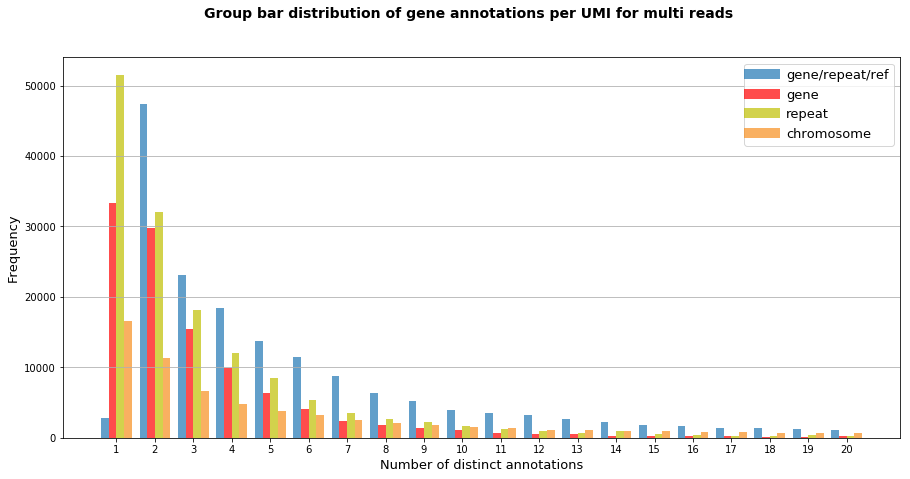

In [239]:
# Setting the positions and width for the bars
pos = list(range(1,21,1))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Group bar distribution of gene annotations per UMI for multi reads', fontsize=14, fontweight='bold')

#create legends
l1 = plt.axhline(y=0.8, linewidth=10, alpha=0.7)
l2 = plt.axhline(y=0.8, linewidth=10, color='r', alpha=0.7)
l3 = plt.axhline(y=0.8, linewidth=10, color='y', alpha=0.7)
l4 = plt.axhline(y=0.8, linewidth=10, color='#F78F1E', alpha=0.7)
l1.remove()
l2.remove()
l3.remove()
l4.remove()
plt.legend([l1, l2, l3, l4], ["gene/repeat/ref", "gene", "repeat", "chromosome"], fontsize= 13, loc=1)


y1 = md1.values()[:20]
y2 = md2.values()[:20]
y3 = md3.values()[:20]
y4 = md4.values()[:20]
# Create a bar with pre_score data,
# in position pos,
plt.bar([p - width for p in pos], y1, width, alpha=0.7)
plt.bar(pos, y2, width, alpha=0.7, color='r')
plt.bar([p + width*2 for p in pos], y3, width, alpha=0.7, color='#F78F1E')
plt.bar([p + width for p in pos], y4, width, alpha=0.7, color='y')
plt.xticks([i + 0.1 for i in pos])
ax.set_xticklabels(pos)
ax.yaxis.grid()

plt.xlabel('Number of distinct annotations' , fontsize=13)
plt.ylabel('Frequency', fontsize=13)
#plt.grid()
#plt.show();
plt.savefig('UMI_gdist_multi');

---------------------